# Various_model

### 최적화
- 목적함수(objective function)을 최대한/최소한하는 파라미터 조합을 찾는 과정
- 경사하강법(gradient descent): 비용/손실함수/오차 
- 경사상승법(gradient ascent): 이익/점수

- 모델 평가 시 손실/비용함수가 값이 최소가 될때가 최적의 모델
- 손실/비용함수 값이 최소가 되는 모델 파라미터를 찾는 것

### 상황별 대처법
- 과소 -> 학습을 더 많이, data 추가
- 과대 -> 1. 스케일링 해야, 2. 학습을 더 적게, 3. 특성 가중치 규제(패널티), 4. 학습의 방법 바꾸기(전체 or 여러 번 쪼개서)
- 최적적합 : 훈련 데이터셋의 규칙/패턴이 일반화된 모델, 새로운 데이터에 대한 정확도 높음
    - 조건 : 1. 규제 통한 모델 복잡도 적정수준 설정, 2. 양질의 많은 데이터, 3. 편중되지 않은 다양성 갖춘 데이터로 학습 진행

### 경사하강법
- epoch : 한 번 반복 의미 (scikit-learn에서의 max_iter)
- Batch-size : 전체 샘플을 쪼개서 나눈 크기

#### 배치학습/ 오프라인학습
- 모든 데이터를 한꺼번에 학습
- 시간과 자원이 많이 소모되어 오프라인에서 수행
- 새 데이터에 대해서, 전체 데이터를 처음부터 다시 학습
#### 점진적학습/ 온라인학습
- 데이터를 순차적으로 한 개씩 또는 작은 묶음으로 학습 진행
- 연속적으로 데이터를 받고 변화에 빠르게 적용 가능
- 기존 모델에 새로운 데이터 추가 학습 진행

### SGD optimizer
- 확률적 경사하강법을 이용하여 구현하는 모델들
- 분류, 회귀에 모두 적용

- SGDclassifier
    - 이진 분류
    - 다중 분류
    - from sklearn.linear_model import SGDclassifier 사용

- SGDregressor
    - 평균제곱근오차 손실함수 사용

# 다중 로지스틱 회귀

In [1]:
# 모듈 로딩
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

In [2]:
iris = load_iris(as_frame=True, return_X_y=True)
type(iris), type(iris[0]), type(iris[1])

(tuple, pandas.core.frame.DataFrame, pandas.core.series.Series)

In [6]:
data, target = iris[0], iris[1]
print(target.head(3), target.unique(), target.value_counts(), sep='\n')

0    0
1    0
2    0
Name: target, dtype: int32
[0 1 2]
0    50
1    50
2    50
Name: target, dtype: int64


[]

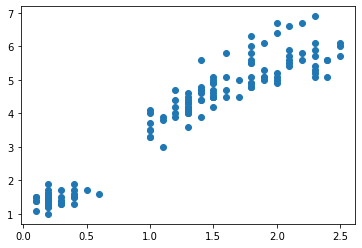

In [7]:
data = data.iloc[:,[2,3]]
plt.scatter(data['petal width (cm)'], data['petal length (cm)'])
plt.plot()

In [8]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data, target)

In [9]:
lor = LogisticRegression()
lor.fit(data_train, target_train)

print(lor.score(data_train,target_train))
print(lor.score(data_test,target_test))

0.9553571428571429
0.9473684210526315


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


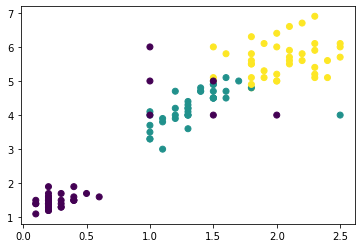

In [10]:
plt.scatter(data_train['petal width (cm)'], data_train['petal length (cm)'], c = target_train)
someList = [[1,4],[1,5], [1,6], [1.5,4], [1.5,5], [1.5,6], [2,4], [2,5], [2,6], [2.5,4]]
plt.scatter([i[0] for i in someList], [i[1] for i in someList], c= lor.predict(someList) )

plt.show()

In [12]:
res = lor.decision_function([[1,4],[1,5], [1,6], [1.5,4], [1.5,5], [1.5,6], [2,4], [2,5], [2,6], [2.5,4]])

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [14]:
# 분류 변환 함수 softmax 사용
from scipy.special import softmax, expit
print(softmax(res))   # 각 항목 별 확률을 반환

[[3.64229701e-01 1.85157979e-02 2.27625360e-04]
 [1.23298044e-01 9.93864456e-03 1.25272310e-03]
 [4.17385171e-02 5.33472316e-03 6.89428973e-03]
 [1.01240112e-01 1.89296735e-02 8.01018767e-04]
 [3.42715264e-02 1.01607988e-02 4.40836082e-03]
 [1.16015035e-02 5.45396792e-03 2.42611608e-02]
 [2.81403750e-02 1.93528003e-02 2.81880308e-03]
 [9.52600289e-03 1.03879187e-02 1.55131210e-02]
 [3.22471649e-03 5.57587811e-03 8.53755714e-02]
 [7.82180782e-03 1.97853851e-02 9.91943153e-03]]


### 로지스틱 회귀

In [15]:
data, target = iris[0], iris[1]
print(target.head(3), target.unique(), target.value_counts(), sep='\n')

0    0
1    0
2    0
Name: target, dtype: int32
[0 1 2]
0    50
1    50
2    50
Name: target, dtype: int64


In [16]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data, target)

In [19]:
lor = LogisticRegression(max_iter=1000)
lor.fit(data_train, target_train, )

print(lor.score(data_train,target_train))
print(lor.score(data_test,target_test))

0.9732142857142857
1.0


In [27]:
new_data = [6.7,3.0,5.2,2.3] 
print(lor.decision_function([new_data]))
# print(data[145:])
print(lor.coef_)
print(lor.classes_)
print(lor.intercept_)

[[-5.29248531  1.51879273  3.77369258]]
[[-0.37134425  0.89560434 -2.32076994 -1.00435332]
 [ 0.51180988 -0.36853638 -0.19984319 -0.80229408]
 [-0.14046564 -0.52706797  2.52061313  1.80664741]]
[0 1 2]
[  8.88672443   2.07973661 -10.96646104]


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [34]:
# y = aw1+bw2+cw3+dw4+e
for i in range(3):
    y = lor.coef_[i][0]+ new_data[0]+\
        lor.coef_[i][1]+ new_data[1]+\
        lor.coef_[i][2]+ new_data[2]+\
        lor.coef_[i][3]+ new_data[3]+lor.intercept_[i]
    print(f'{i} : {y}')

0 : 23.285861268359263
1 : 18.42087284768069
2 : 9.893265883959979


In [37]:
softmax(lor.decision_function([new_data]))

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[1.04531424e-04, 9.49177287e-02, 9.04977740e-01]])